In [3]:
import numpy as np
lst = np.arange(5)
lst

array([0, 1, 2, 3, 4])

In [7]:
np.random.choice(lst, size=5)

array([2, 2, 4, 0, 3])

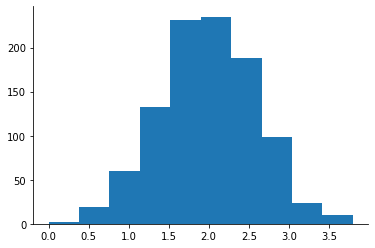

In [25]:
import matplotlib.pyplot as plt
mean_distro = [np.mean(np.random.choice(lst, size=5)) for _ in range(1000)]

fig, ax = plt.subplots()
ax.hist(mean_distro, bins=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Sampling Distributions

**Success Criteria**

Today I will be successful if I can ...

1. Explain what a Random Variable is in Statistics
2. Describe differences between CDF, PDF, and PMF
1. Explain what is meant by i.i.d.
2. Describe a sample statistic
3. Explain a statistic distribution 
4. Detail what steps are required to bootstrap a sample

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

### Random Variables

Recall that a random variable X is an object that can be used to generate numbers, in a way that variable makes up some probability distribution. 

Discrete: Distinct or separate values

Continuous: Take on any value in an interval


    Lets say we have Random Variable X and it is equal to 1 if a coin flips heads and 0 if a coin flip results in tails. (is this discrete or continuous?)

discrete

    Lets say we have Random Variable Y and it is equal to the mass of a random animal selected at the San Diego Zoo.  (is this discrete or continuous?)

continuous

### Some discrete distributions:

What's the relationship between the pmf and cdf?



In [64]:
# binomial = np.random.binomial(n=8, p=0.5)
stats.randint(0,9).cdf(np.arange(9))

array([0.00390625, 0.03125   , 0.109375  , 0.21875   , 0.2734375 ,
       0.21875   , 0.109375  , 0.03125   , 0.00390625])

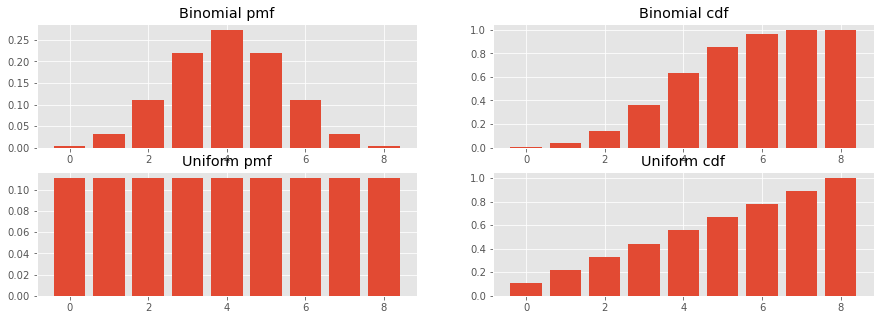

In [11]:
def plot_dist_discrete(dist, name, ax):
    ax[0].bar(np.arange(9), dist.pmf(np.arange(9)))
    ax[0].set_title(f'{name} pmf')
    ax[1].bar(np.arange(9), dist.cdf(np.arange(9)))
    ax[1].set_title(f'{name} cdf')
    
binomial = stats.binom(n=8, p=0.5)
uniform = stats.randint(0,9)

fig, ax = plt.subplots(2, 2, figsize=(15,5))
plot_dist_discrete(binomial, 'Binomial', ax[0])
plot_dist_discrete(uniform, 'Uniform', ax[1])

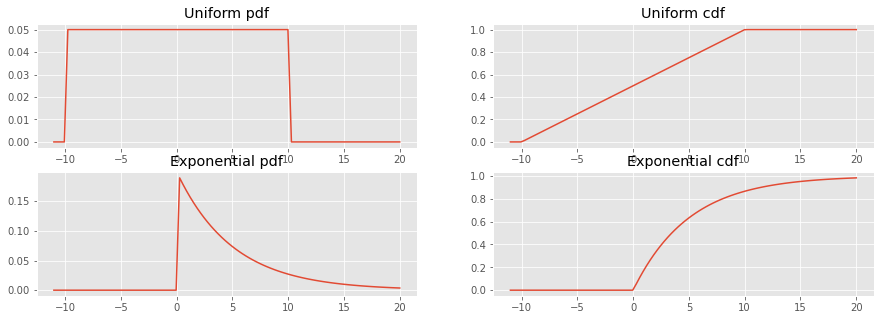

In [16]:
def plot_dist_continuous(dist, name, ax):
    x = np.linspace(-11, 20, 100)
    ax[0].plot(x, dist.pdf(x))
    ax[0].set_title(f'{name} pdf')
    ax[1].plot(x, dist.cdf(x))
    ax[1].set_title(f'{name} cdf')
    
uniform = stats.uniform(-10, 20)
exponential = stats.expon(0, 5)

fig, ax = plt.subplots(2, 2, figsize=(15,5))
plot_dist_continuous(uniform, 'Uniform', ax[0])
plot_dist_continuous(exponential, 'Exponential', ax[1])

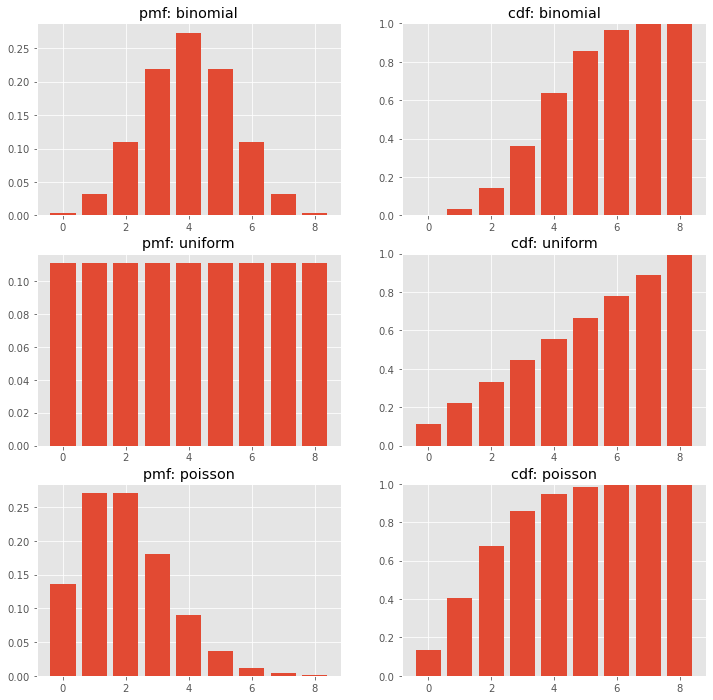

In [49]:
binomial = stats.binom(n=8, p=0.5)
uniform = stats.randint(0,9)
poisson = stats.poisson(2)

def plot_dist_discrete(dist, name, ax):
    ax[0].bar(np.arange(9), dist.pmf(np.arange(9)))
    ax[0].set_title('pmf: {}'.format(name))
    ax[1].bar(np.arange(9), dist.cdf(np.arange(9)))
    ax[1].set_title('cdf: {}'.format(name))
    ax[1].set_ylim(0, 1)


fig, ax = plt.subplots(3, 2, figsize=(12, 12))

plot_dist_discrete(binomial, 'binomial', ax[0])
plot_dist_discrete(uniform, 'uniform', ax[1])
plot_dist_discrete(poisson, 'poisson', ax[2])

### Some continuous distributions:

What's the relationsihp between the pdf and the cdf?

What is the absolute likelihood of getting a value of e.g. 0.03 on one of these distributions?

What is the *relative* likelihood of getting a particular value?

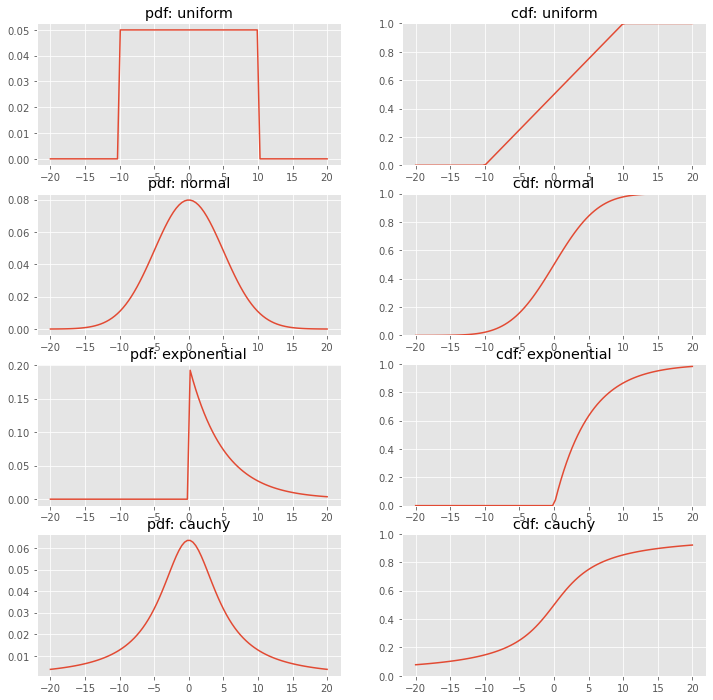

In [54]:
uniform = stats.uniform(-10, 20)
normal = stats.norm(0, 5)
cauchy = stats.cauchy(0, 5)
exponential = stats.expon(0, 5)

def plot_dist_continuous(dist, name, ax):
    x = np.linspace(-20, 20, 100)
    ax[0].plot(x, dist.pdf(x))
    ax[0].set_title('pdf: {}'.format(name))
    ax[1].plot(x, dist.cdf(x))
    ax[1].set_title('cdf: {}'.format(name))
    ax[1].set_ylim(0, 1)
#     if dist == exponential:
#         ax[0].set_xlim(0, 20)        
#         ax[1].set_xlim(0, 20)





fig, ax = plt.subplots(4, 2, figsize=(12, 12))

plot_dist_continuous(uniform, 'uniform', ax[0])
plot_dist_continuous(normal, 'normal', ax[1])
plot_dist_continuous(exponential, 'exponential', ax[2])
plot_dist_continuous(cauchy, 'cauchy', ax[3])

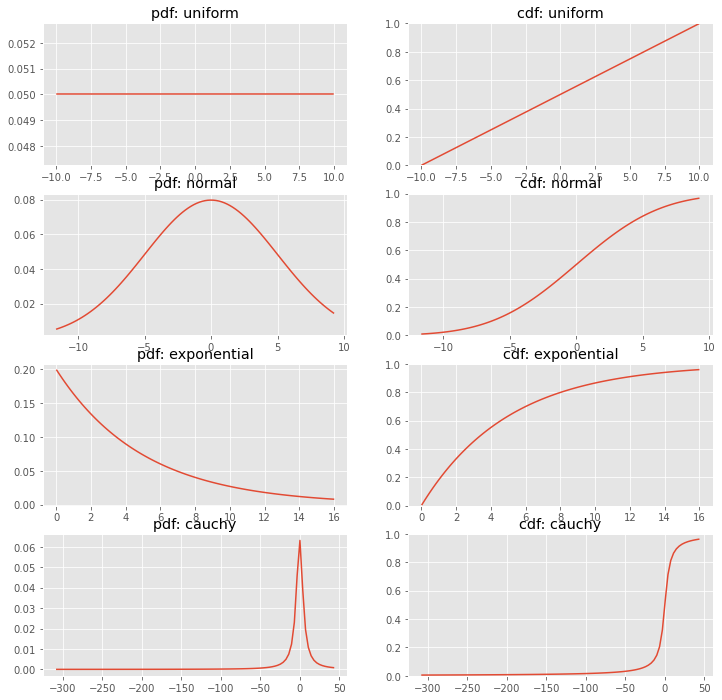

In [4]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
uniform = stats.uniform(-10, 20)
normal = stats.norm(0, 5)
cauchy = stats.cauchy(0, 5)
exponential = stats.expon(0, 5)

def plot_dist_continuous(dist, name, ax):
    sample = dist.rvs(50)
    x = np.linspace(min(sample), max(sample), 100)
    ax[0].plot(x, dist.pdf(x))
    ax[0].set_title('pdf: {}'.format(name))
    ax[1].plot(x, dist.cdf(x))
    ax[1].set_title('cdf: {}'.format(name))
    ax[1].set_ylim(0, 1)
#     if dist == exponential:
#         ax[0].set_xlim(0, 20)        
#         ax[1].set_xlim(0, 20)





fig, ax = plt.subplots(4, 2, figsize=(12, 12))

plot_dist_continuous(uniform, 'uniform', ax[0])
plot_dist_continuous(normal, 'normal', ax[1])
plot_dist_continuous(exponential, 'exponential', ax[2])
plot_dist_continuous(cauchy, 'cauchy', ax[3])

### Identically Distributed

If two random variables have the *same* distribution function, we say they are *identically distributed*, and we denote this relationship

$$ X \sim Y $$

In practice this means **any probabilistic statements we make about $X$ and $Y$ have the same answer**.

In [61]:
rv_1 = stats.norm(0,10)
rv_2 = stats.norm(0,10)
stats.norm(0,10).rvs(2)

array([-13.7243004 ,   2.56406157])

In [74]:
print("Observation from first random variable: {}".format(rv_1.rvs()))
print("Observation from first random variable: {}".format(rv_2.rvs()))

Observation from first random variable: -14.062794242841575
Observation from first random variable: -2.118888024805337


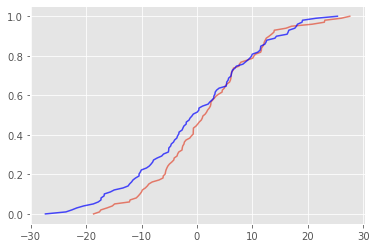

In [70]:
plt.plot(np.sort(rv_1.rvs(100)), np.linspace(0, 1, 100), alpha = 0.7)
plt.plot(np.sort(rv_2.rvs(100)), np.linspace(0, 1, 100), color = 'blue', alpha = 0.7)

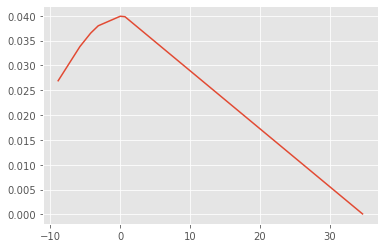

In [22]:
dist = stats.norm(0,10)
x = np.sort(dist.rvs(10))
plt.plot(x, dist.pdf(x))

# Sampling Theory

In this section we will take another path towards understanding samples taken from an unknown population.  

## Sampling Distributions of Statistics

#### What is a sampling distribution? 

Imagine we are interested in a parameter of some population, like the average height of women in Data Science. We don't have access to the population so I start with getting a sample of 20 Data Scientist. 

    Population Parameter: Average Height

So I have gathered numerous samples, each size 20.f I can gather means from my various samples of information coming in. 

    Sample Statistics: Average Height of each random sample

Now the question is, what is the distribution of all of the sample statistics, this is known as our Sampling Disribution?

    Sampling Distribution: Distribution of Sample Statistics 



#### A more complex and in depth view:


This Distribution helps us mathematically model a simple random sample. For example, each of the following can be modeled as taking an i.i.d. (independent and identically distributed) random sample from a population:

  - A random survey of humans is an i.i.d sample of all humans of interest to the survey designers.
  - A dataset of all the quotes received for an insurance product is an i.i.d sample of all possible customers of the insurance company.
  - Driving around a city and turning a random direction at each intersection is an i.i.d sample of all possible paths driven through the city (as long as you start in a random place).
  
When we have such a situation, we will adopt a slight change in perspective that will make our mathematics work out more easily:

**We consider each individual data point drawn from our population as the outcome from its own random variable.**

So, under this model, a i.i.d sample can be thought of as a **sequence of random variables that are independent and identically distributed**

$$ X_1, X_2, X_3, \ldots, X_n $$

When we actually **physically take** the sample, i.e. **collect data**, we get datapoints $x_1, x_2, \ldots, x_n$, each one drawn from the corresponding random varaible $X_k$.
  
A **statistic** is a function of a random sample $T(X_1, X_2, ..., X_n)$.  I.e., something we can compute once we have a random sample.  Drawing different random samples will result in different values of the statistic.

### Examples of Statistics

Here are a couple simple and common statistics.  To illustrate, we've drawn 20 samples from a normal distribution and recorded the value of the statistic.

The **sample mean** is a statistic defined by $\frac{1}{n} \sum_i X_i$

In [79]:
normal = stats.norm(64.5, 2.5)
normal.rvs(20)

array([62.52892354, 67.54777309, 62.81630741, 62.09748431, 63.07208121,
       65.29819083, 64.38820217, 65.56540267, 63.89302214, 62.67732297,
       61.6537772 , 61.49536647, 63.75658415, 60.82456524, 64.18005988,
       70.06715821, 65.23408267, 65.22664789, 65.5034449 , 65.5404783 ])

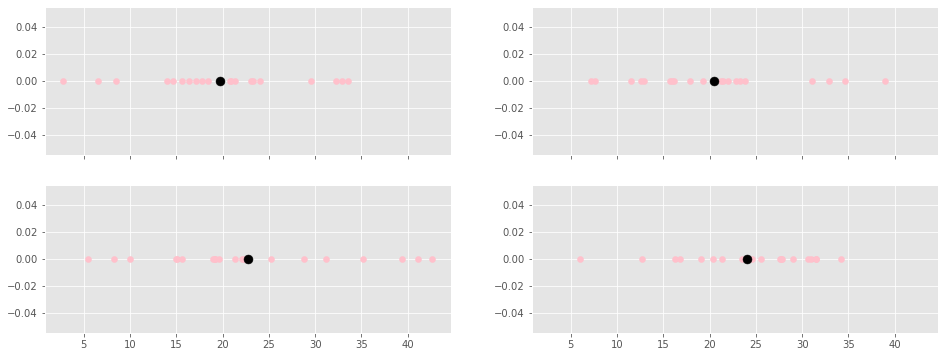

In [29]:
normal = stats.norm(20,10)

fig, axs = plt.subplots(2,2, sharex=True, figsize=(16, 6))

for ax in axs.flatten():
    sample = normal.rvs(20)
    ax.scatter(sample, np.zeros(shape=len(sample)), color='pink')
    
    mean = np.mean(sample)
    ax.scatter(mean,0, c='black', s=80)

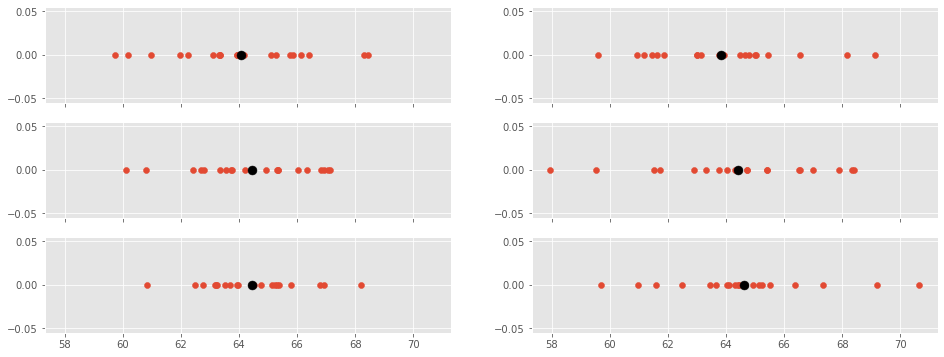

In [80]:
np.random.seed(42)
normal = stats.norm(64.5, 2.5)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)



for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)

    ax.scatter([mean], 0, c="black", s=80)

The **sample maximum** is defined by $\max (X_1, X_2, \ldots, X_n)$

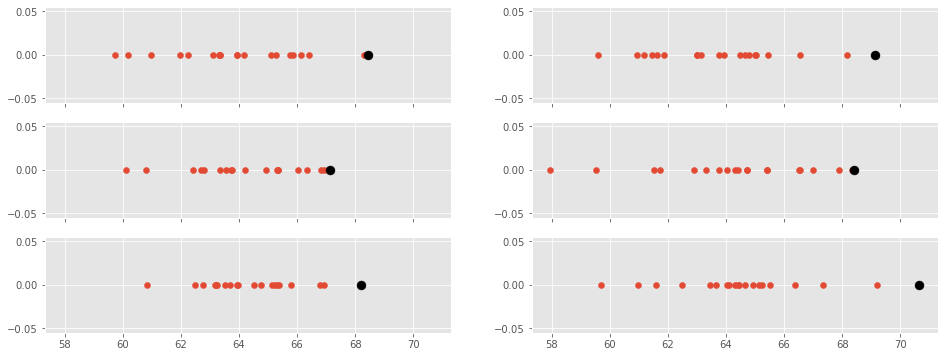

In [81]:
np.random.seed(42)
normal = stats.norm(64.5, 2.5)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)

for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    M = np.max(samp)
    ax.scatter([M], 0, c="black", s=80)

**Question:** What is another sample statistic that is commonly encountered?

**Question:** Explain in your own words why sample statistics are random varaibles.  Give an example of an interesting probability involving a sample statistic.

**Answers**

Commonly used sample statistics
any of the descriptive stats 
min, Q1, med, mean, Q3, max, IQR..

Why sample stats are RV
RV is a random proccess that maps to an outcome, that can be displayed most likely in a probability distribution.
Sample stats repeated over x number of times are mapped to a numerical outcome that can be mapped to a distribution of statistics.

## The Main Question In Sampling Theory

#### How do we **quantify** the amount of variation of a sample statistic?

To quantify the amount of variation of a statistic, we would really like a process like this:

  - Draw some number of independent and identically distributed data from the population $X$, i.e. a sample.
  - Compute the statistic using the sample you drew.
  - Record the value of the statistic just computed in a database.
  - Do it again, and again, and again, until the sun burns out.
  
After this process is complete, we have many examples of our statistic, each computed from a different random sample from our variable.

The distribution of *the statistic* that arises from this process is called the **sampling distribution of the statistic**.

### Example: Sample Means from A Normal Variable

Recall our sample means from the previous example:

[64.07175359639544,
 63.83506221151488,
 64.43327406906101,
 64.42150860672429,
 64.4403200488782,
 64.61054564158637]

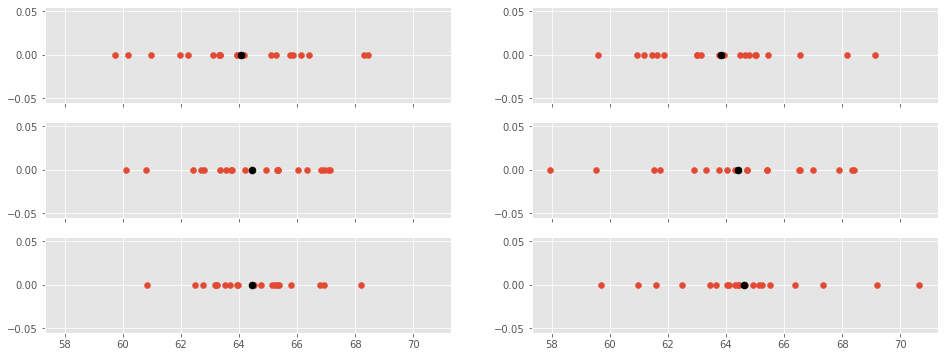

In [83]:
np.random.seed(42)
normal = stats.norm(64.5, 2.5)

fig, axs = plt.subplots(3, 2, figsize=(16, 6), sharex=True)


means = []
for ax in axs.flatten():
    samp = normal.rvs(20)
    ax.scatter(samp, np.repeat(0, 20))
    mean = np.mean(samp)
    means.append(mean)
    ax.scatter([mean], 0, c="black", s=50)
means

The distribution of the *black points* is the **sampling distribution of the mean**.

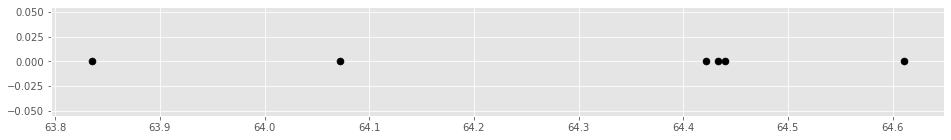

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(means, np.repeat(0, 6), c='black', s=50);

If we superimpose a sample from the original distribution, it's very clear that the spread of the sampling distribution is much smaller than that of the original.

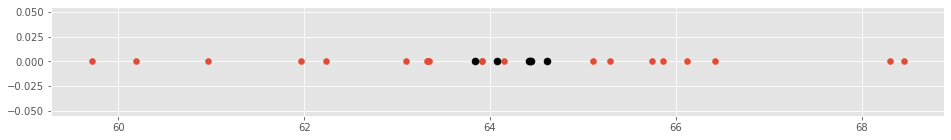

In [86]:
np.random.seed(42)
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(normal.rvs(20), np.repeat(0, 20))
ax.scatter(means, np.repeat(0, 6), c='black', s=50);

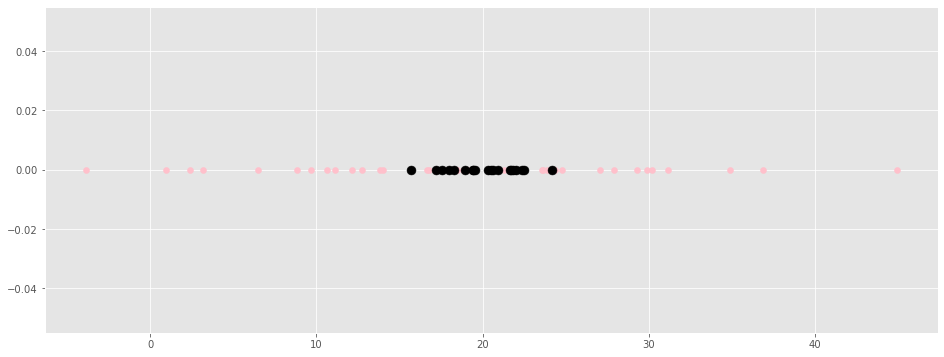

In [34]:
normal = stats.norm(20,10)

fig, ax = plt.subplots(1,1, figsize=(16, 6))

sample = normal.rvs(40)
ax.scatter(sample, np.zeros(shape=len(sample)), color='pink')

mean = [np.mean(normal.rvs(20)) for _ in range(20)]
ax.scatter(mean, np.repeat(0,len(mean)) , c='black', s=80)

Two questions present themselves:

  - What is the average value of the statistic?
  - How much does the statistic vary around its average value?

average value of mean? == mean of mean

varay around the mean == std of the means from the mean of mean

In [90]:
np.random.uniform(-0.2, 0.2, size=(2,2))
np.repeat(0.0, len([[1,2],[1,2]]))

array([0., 0.])

In [91]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

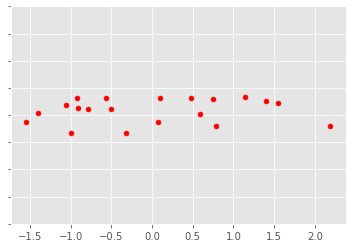

In [95]:
# test one_dim_scatterplot
fig, ax = plt.subplots()

one_dim_scatterplot(stats.norm(loc=0, scale=1).rvs(20), ax, jitter=0.2, c='red', s=25)

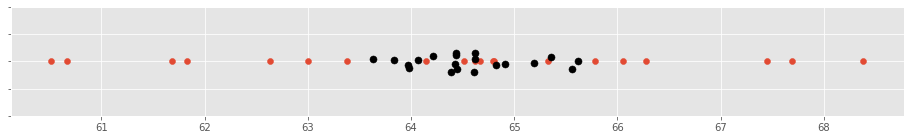

In [96]:
np.random.seed(42)
normal = stats.norm(64.5, 2.5)

means = []
for ax in range(20):
    samp = normal.rvs(20)
    mean = np.mean(samp)
    means.append(mean)
 
    
fig, ax = plt.subplots(1, 1, figsize=(16, 2))
ax.scatter(normal.rvs(20), np.repeat(0, 20))
one_dim_scatterplot(np.array(means), ax, jitter=0.2, c='black', s=50)


## The Bootstrap

As we will see later next week, the central limit theorem is nice, it is a central result in mathematical statistics, and there is no other result in the subjects with the definitive nature of the CLT.

On the other hand, it has a huge drawback: **it only works for a single statistic, the sample mean!**  It would be nice to have a general procedure that will let us estimate the varaince (or the entire distribution) of **any sample statisic**.

### Bootstrap Samples

We generally have one fixed dataset, which we view as a single sample from the population.  **The population is the object that interests us, and the sample is the lens through which we get to view it.**

The idea behind the bootstrap is that the **empirical distribution** of the sample should be our **best approximation** to the distribution of the population the sample is drawn from.  We can illistrate this by comapring the emperical distribution functions of samples to the actual population distribution functions:

<!-- emperical distribution: Best estimate of population distribution aka -->

In [136]:
x = np.linspace(-3,3,num=25)
data = stats.norm(0.9, 0.6).rvs(5)
weight = 1.0 / len(data)
count = np.zeros(shape=len(x))
for datum in data:
    print(datum)
    print(x)
    print(count)
    count += np.array(x >= datum)
    print(count)
    print()
    


0.39678628577766417
[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]

1.141693032649786
[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.
 2.]

0.9061050424448582
[-3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25
  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.
 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 3. 3. 3. 3. 3. 3. 3.
 3.]

1.01096536

In [141]:
np.zeros(4) + np.array([True,False,False,True])

array([1., 0., 0., 1.])

In [137]:
#pdf not acutally used in this notebook... here just in case you want to play with pdf
def superimpose_pdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=250)
    _ = ax.hist(data, bins=25, normed=True, color="black", alpha=0.4)
    ax.plot(x, model.pdf(x), linewidth=3)
    
def emperical_distribution(x, data):
    weight = 1.0 / len(data)
    count = np.zeros(shape=len(x))
    for datum in data:
        count += np.array(x >= datum)
    return weight * count
    
    
def superimpose_cdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=250)
    ax.plot(x, emperical_distribution(x, data), linewidth=2, label='Sample')
    ax.plot(x, model.cdf(x), linewidth=2, label='Distribution')
    

Text(0.5, 0.98, 'Population vs. Sample CDFs')

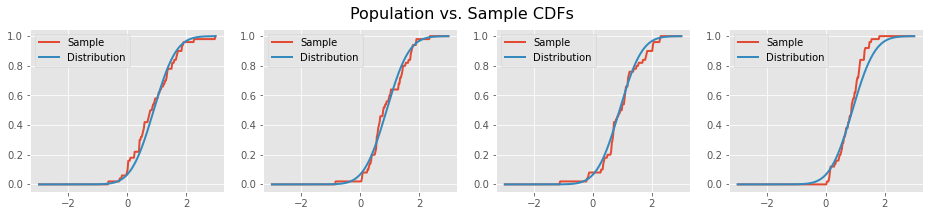

In [138]:
population = stats.norm(0.9, 0.6)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.rvs(50)
    superimpose_cdf_of_fit_model(sample, population, ax)
    ax.legend()
fig.suptitle("Population vs. Sample CDFs", fontsize=16)


Text(0.5, 0.98, 'Population vs. Sample CDFs')

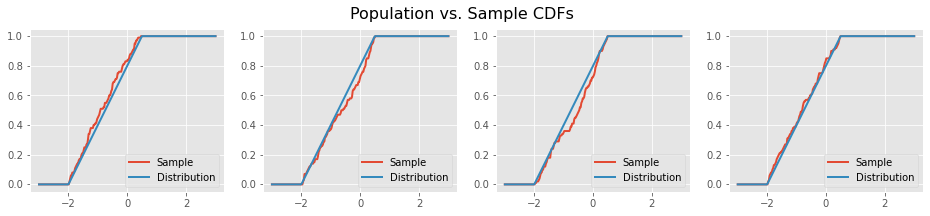

In [118]:
population = stats.uniform(-2, 2.5)

fig, axs = plt.subplots(1, 4, figsize=(16, 3))

for ax in axs.flatten():
    sample = population.rvs(100)
    superimpose_cdf_of_fit_model(sample, population, ax)
    ax.legend()
fig.suptitle("Population vs. Sample CDFs", fontsize=16)

This means that  **since we cannot repeatedly sample from the population, our next best bet is to sample from the sample itself**.

#### Bootstrap: The Big Idea

We want to do this:

> Estimate the variance of a sample statistic by repeatedly sampling from the population, computing the sample means of these samples, and then computing the variance of the multiple sample means.

But we **can't**, because we can **only sample from the population one time**.

Instead, we repeatedly sample from our **best approximation to the population distribution**, which is given by the **empirical density function of the sample**.

That is, instead we do

> Estimate the variance of the sample means by repeatedly sampling from *a distribution approximating the population distribution*, computing the sample means of these samples, and then computing the variance of the multiple sample means.

### Definition

A **bootstrap sample** from a dataset is a sample taken with replacement from that dataset whose size is the size of the dataset itself.

In [145]:
data = stats.norm(0.1, 1.0).rvs(100)

def text_in_blank_plot(text, ax):
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22)
    ax.axis('off')

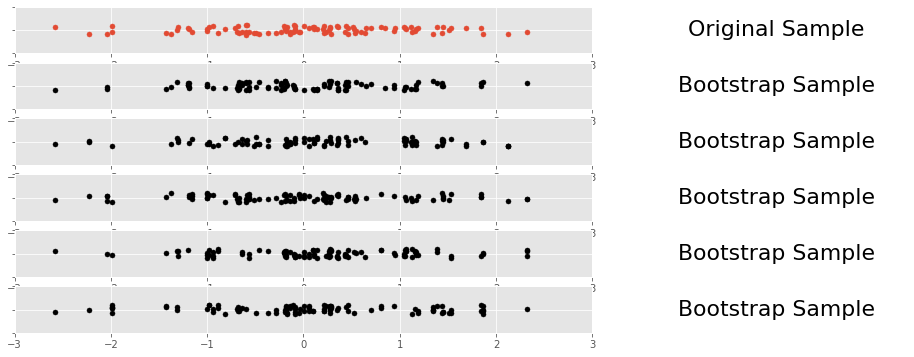

In [146]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

Each bootstrap sample has it's **own** sample median

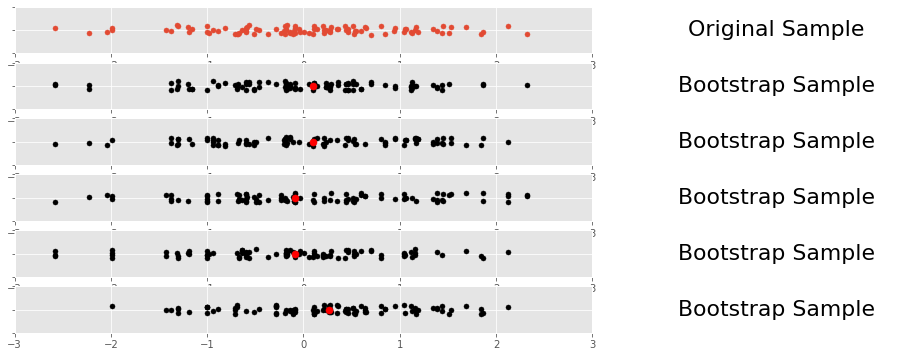

In [147]:
fig = plt.figure(figsize=(16, 6))

ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("Original Sample", ax)

for i in range(0, 5):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(bootstrap_sample, ax, c="black", s=25)
    sample_mean = np.median(bootstrap_sample)
    ax.scatter([sample_mean], 0, c="red", s=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Bootstrap Sample", ax)

The sample means taken from repeated bootstrap samples are then an approximation to the **distribution of the sample medians**

In [148]:
def bootstrap_sample_medians(data, n_bootstrap_samples=10000):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return bootstrap_sample_medians

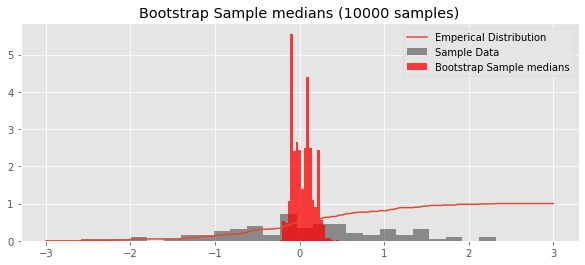

In [152]:
bootstrap_medians = bootstrap_sample_medians(data)
x= np.linspace(-3,3, num=250)
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(data, bins=25, density=True, color="black", alpha=0.4,
            label="Sample Data")
_ = ax.hist(bootstrap_medians, bins=25, density=True, color="red", alpha=0.75,
            label="Bootstrap Sample medians")
_ = ax.plot(x, emperical_distribution(x, data),
            label="Emperical Distribution")
ax.legend()
_ = ax.set_title("Bootstrap Sample medians (10000 samples)")

In [154]:
def bootstrap_sample_mean(data, n_bootstrap_samples=10000):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.mean(bootstrap_sample))
    return bootstrap_sample_means

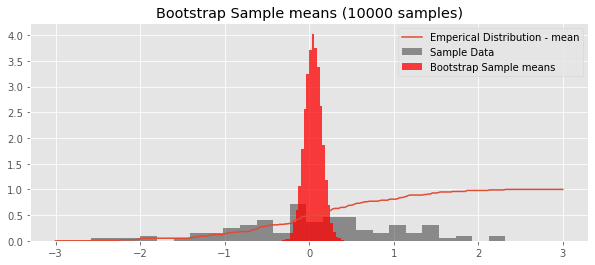

In [156]:
bootstrap_means = bootstrap_sample_mean(data)
x= np.linspace(-3,3, num=250)
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(data, bins=25, density=True, color="black", alpha=0.4,
            label="Sample Data")
_ = ax.hist(bootstrap_means, bins=25, density=True, color="red", alpha=0.75,
            label="Bootstrap Sample means")
_ = ax.plot(x, emperical_distribution(x, data),
            label="Emperical Distribution - mean")
ax.legend()
_ = ax.set_title("Bootstrap Sample means (10000 samples)")

We can now use the bootstrap distribution of the sample median to estimate statistics like the variance of the sample median. 

In [153]:
variance_of_sample = np.var(data)
varaince_of_bootstrap_medians = np.var(bootstrap_medians)

print("Variance of Sample: {:2.2f}".format(variance_of_sample))
print("Variance of Sample medians: {:2.2f}".format(varaince_of_bootstrap_medians))

Variance of Sample: 0.95
Variance of Sample medians: 0.01


## Confidence Intervals: Capturing Population Parameters

Recall our statement from earlier

> Our general interest is in the **population**, the **sample** is just the lens we get to view it through.

We have shown that **sample statistics are generally good approximations of properties of the population**, and we have also discovered **methods for approximating the distribution of sample statistics**  such as bootstrapping.

Together these allow us to address a final question

> How good of an approximation of a population parameter is a sample statistic?

### Example: Bootstrap Confidence Interval for the Standard Deviation

The above example relied on the central limit theorem to provide the sampling distribution of the statistic, which is only possible for very specific sample statistics.

Consider estimating a confidence interval of the median of a population.  In this case, the central limit theorem does not allow us to derive a mathematical form of the sampling distribution, instead we can proceed by using bootstrap sampling.

Here is the bootstrap procedure for computing a confidence interval for a median

  - Draw many bootstrap samples from your main sample, and for each:
    - Compute the sample statistic (using the bootstrap sample)
  - Gather together all the sample statistics of the various bootstrap samples into a list.
  
The resulting list can be considered as a sample from the sampling distribution of the statistic.

  - Compute the 95% confidence interval by finding the 0.025 and 0.975 percentiles of the resulting list of sample statistics.

In [157]:
bootstrap_sample_std = []
for i in range(10000):
    bootstrap = np.random.choice(data, size=len(data), replace=True)
    bootstrap_std = np.std(bootstrap)
    bootstrap_sample_std.append(bootstrap_std)

This code creates an approximation the the sampling distribution of the statistic.

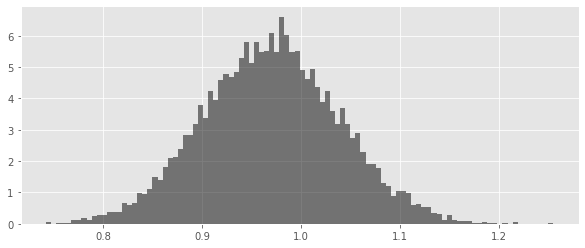

In [158]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(bootstrap_sample_std, bins=100, density=True, color="black", alpha=0.5)

We get a confidence interval by computing the 0.025 and 0.975 percentiles of the resulting sampling distribution approximation

In [165]:
left_endpoint = np.percentile(bootstrap_sample_std, 2.5)
right_endpoint = np.percentile(bootstrap_sample_std, 97.5)

print("Sample std: {:2.2f}".format(np.std(data)))
print("Bootstrap Confidence Interval for Population std: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample std: 0.98
Bootstrap Confidence Interval for Population std: [0.84, 1.11]


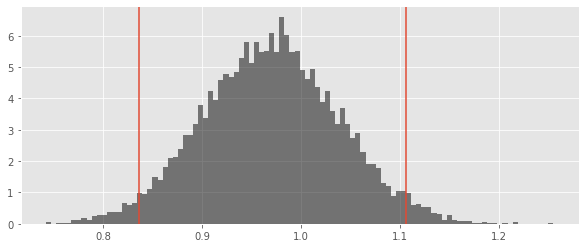

In [162]:
fig, ax = plt.subplots(1, figsize=(10, 4))
_ = ax.hist(bootstrap_sample_std, bins=100, density=True, color="black", alpha=0.5)
ax.axvline(left_endpoint)
ax.axvline(right_endpoint);

**Question:** Why is this confidence interval not symmetric?

### Bootstrap: The Point

The Bootstrap is a tool to **quantify the variation in a statistical estimate**.  It can be used in almost **any** situation.

The bootstrap is a giant point in favor of the massive amount of computation all of us has at our disposal in modern day.  Before the computer age, the practice of statistics was tedious and mathematical.  Now we can estimate things earlier generaitions would **never have dreamed of** by simply putting to work some carefully engeneered slabs of silicon.


## Example: 

A recent Rasmussen poll polled 2500 likely voters. It found support for Joe Biden at 49%, and Trump at 46%  with a margin of error of 2 points.
A Quippiniac poll polled 1426 likely voters. It found support for Joe Biden at 51% and Donald Trump at 41% with a margin of error of 2.6 points.

What are the sample means? What are the population means? What are the margins of error? Can we use bootstrapping here? What is a likely voter anyway?